# __Rad Calcs!__  

In [2]:
import math 
import radioactivedecay as rd #initiate radioactive decay library
import matplotlib
#import pandas as pd
import csv
import datetime

## Radioactive decay calculator
   _Run cells sequentially_

Isotope


 Ga68


Time interval
y = years, d = day, h = hours, m = minutes


 h


half life = 1.1284999999999998h


Bq at QC =   10000
Time elapsed from QC =   6


251.08797505878024Bq
2.51% remaining from activity at QC
{'Ga-68': 1470498.7836551056, 'Zn-68': 57140429.947499916}


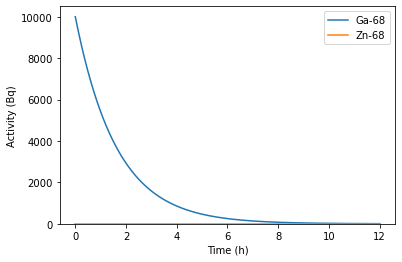

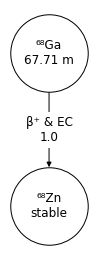

In [3]:
print('Isotope')  
iso = input()   #select isotope from rd library

print('Time interval')
print('y = years, d = day, h = hours, m = minutes')
ti = input() #choose scale for time interval 

nuc = rd.Nuclide(iso) #call half-life from rd library

print(f"half life = {nuc.half_life(ti)}{ti}")

t2 = nuc.half_life(ti) #return half life in hours

N0 = float(input('Bq at QC =  ')) #starting activity

t = float(input('Time elapsed from QC =  ')) #in same units as half life

N = N0*(math.exp(-(0.693/t2)*t))

pr = (N/N0)*100
pr_f = "{:.2f}".format(pr) #restrict decimal places to 2

inv = rd.Inventory({iso: N0}) #construct inventory isotope and quantity
inv_t1 = inv.decay(t,ti) #construct inventory of decay chain products

print(f"{N}Bq")
print(f"{pr_f}% remaining from activity at QC")

inv.plot(t*2, ti) #plot of radioactive decay for time and units specified

nuc.plot() #show visual decay scheme

print(inv_t1.contents) #decay chain products and quanitities in units provided above

## Decay corrected stock concentration

In [7]:
#Concentration of Stock calculator
#Divide Bq/ml by Bq/mmol and mulitply by the fraction of isotope remaining to mmol/ml or M. 
#Assumes that the decay product is not biologically active and that there is one isotope tag per molecule

Bq_M = float(input('TBq/mmol = ')) #Specific activity
Bq_ml = float(input('TBq/ml = ')) #concentration

M = (Bq_ml/Bq_M)*(N/N0) #Bq/ml divided by Bq/mmol multiplied by the fraction of isotope remaining. N and N0 are variables taken from the radioactive decay calculator

print(f"stock concentration = {M}M")


TBq/mmol =  4000
TBq/ml =  2000


stock concentration = 0.012554398752939013M


## Working solution preperation


In [8]:
# Dilution of stock calculator

f_c = float(input('final concentraion (nM) =  '))   #desired concentraion of the final solution in nM
f_v = float(input('final volume (ml) =  '))  #volume required

s_v = (f_c/(M*1e9))*f_v #volume of stock solution required to achieve desired working solution

b_v = f_v - s_v #volume of diluent required to achieve the desired working solution

print(f"{s_v*1e3}ul of stock") #volume of stock in ul
print(f"{b_v*1e3}ul of buffer") #volume of buffer in ul



final concentraion (nM) =   100
final volume (ml) =   0.1


0.0007965335653894997ul of stock
99.99920346643462ul of buffer


## Data output 

In [9]:
#output the data to csv

date = datetime.datetime.now() #output current date and time

def output():
    #build data output csv format
    title = ['Output from Radcalcs',date,"","","","",""]
    title2 = ['Radioactive decay']
    iso_data =[iso,(f"t1/2={t2}{ti}"),(f"time elapsed ={t}{ti}")]
    header2 = ['Bq at Qc', 'Bq at t0', '% remaining','TBq/mmol','TBq/ml','M']
    title3 = ['Preperation of working solution']
    header3 = ['final (nM)', 'final (ml)', 'stock (ul)', 'buffer (ul)']

    with open('output.csv','w') as f:
        writer = csv.writer(f, delimiter =',')
        writer.writerow(title)
        writer.writerow(iso_data)
        writer.writerow('')
        writer.writerow(title2)
        writer.writerow(header2)
        writer.writerow([N0, N, pr_f, Bq_M, Bq_ml, M])
        writer.writerow('')
        writer.writerow(title3)
        writer.writerow(header3)
        writer.writerow([f_c, f_v, s_v, b_v])
    
    with open('output.csv','r') as file:
        data_x = csv.reader(file, delimiter = ',')
        for line in data_x:
            print(line)

    #output = pd.read_csv('output.csv')
    #return output

output()

['Output from Radcalcs', '2022-08-08 12:28:43.488549', '', '', '', '', '']
['Ga68', 't1/2=1.1284999999999998h', 'time elapsed =6.0h']
[]
['Radioactive decay']
['Bq at Qc', 'Bq at t0', '% remaining', 'TBq/mmol', 'TBq/ml', 'M']
['10000.0', '251.08797505878024', '2.51', '4000.0', '2000.0', '0.012554398752939013']
[]
['Preperation of working solution']
['final (nM)', 'final (ml)', 'stock (ul)', 'buffer (ul)']
['100.0', '0.1', '7.965335653894998e-07', '0.09999920346643462']


***
***
## Detector Efficiency


In [36]:
#Percentage detector efficiency calculator for gamma counter


working_Bq_ml = Bq_ml*(s_v/f_v) #bq/ml of working solution
print(f"working solution  =   {working_Bq_ml}'TBq/ml")

vol = float(input('volume of working solution (ml) =    '))   #volume of the working solution taken for efficiency calculation



 


working solution  =    2.268110623920351e+28 TBq/ml


volume of working solution (ml) =     0.5
